In [2]:
import pandas as pd

# Load the training subset
training_sample = pd.read_csv('/Users/David/Desktop/Zillow/training_sample.csv')
training_sample.head(3)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,random_value
0,11267116,0.084875,2017-06-21,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,117747.0,147182.0,2016.0,29435.0,2537.05,NaN,NaN,6.037901e+13,-4.707495
1,12941171,0.041719,2017-07-19,NaN,NaN,NaN,2.0,4.0,NaN,6.0,...,NaN,134000.0,397000.0,2016.0,263000.0,5174.59,NaN,NaN,6.037407e+13,-4.396730
2,14602106,-0.048100,2016-07-05,NaN,NaN,NaN,2.5,2.0,NaN,NaN,...,NaN,154894.0,392000.0,2015.0,237106.0,6121.24,NaN,NaN,6.059032e+13,-4.338861


In [3]:
training_sample.columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcn

In [9]:
training_sample[['basementsqft']] = training_sample[['basementsqft']].fillna(0)

In [34]:
import numpy as np

np.median(training_sample[training_sample.calculatedbathnbr.notnull()].calculatedbathnbr)

2.0

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


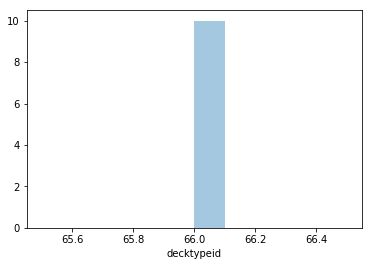

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(training_sample.decktypeid.dropna())
plt.show()

In [42]:
training_sample.groupby(['decktypeid']).agg(['count'])

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,random_value
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
decktypeid,,,,,,,,,,,,,,,,,,,,,
66.0,120,120,120,0,0,120,120,120,0,0,...,0,120,120,120,120,120,2,2,120,120


In [44]:
# Setting 0 for all NA values for now
# Absence suggests the entity doesn't exist and central tendency should not be replacement
# E.g., even for square footage, maybe we're talking an empty lost with no such measure
# All documented multicategorical variables start from 1; 0 is good way to capture information on NAs
# Am I treating an boolean values properly? Might make sense to create a third category to capture information on NAs
training_sample[['basementsqft']] = training_sample[['basementsqft']].fillna(0)
training_sample[['bathroomcnt']] = training_sample[['bathroomcnt']].fillna(0)
training_sample[['bedroomcnt']] = training_sample[['bedroomcnt']].fillna(0)
training_sample[['calculatedbathnbr']] = training_sample[['calculatedbathnbr']].fillna(0)
training_sample[['threequarterbathnbr']] = training_sample[['threequarterbathnbr']].fillna(0)
training_sample[['finishedfloor1squarefeet']] = training_sample[['finishedfloor1squarefeet']].fillna(0)
training_sample[['calculatedfinishedsquarefeet']] = training_sample[['calculatedfinishedsquarefeet']].fillna(0)
training_sample[['finishedsquarefeet6']] = training_sample[['finishedsquarefeet6']].fillna(0)
training_sample[['finishedsquarefeet12']] = training_sample[['finishedsquarefeet12']].fillna(0)
training_sample[['finishedsquarefeet13']] = training_sample[['finishedsquarefeet13']].fillna(0)
training_sample[['finishedsquarefeet15']] = training_sample[['finishedsquarefeet15']].fillna(0)
training_sample[['finishedsquarefeet50']] = training_sample[['finishedsquarefeet50']].fillna(0)
training_sample[['fireplacecnt']] = training_sample[['fireplacecnt']].fillna(0)
training_sample[['fullbathcnt']] = training_sample[['fullbathcnt']].fillna(0)
training_sample[['garagecarcnt']] = training_sample[['garagecarcnt']].fillna(0)
training_sample[['garagetotalsqft']] = training_sample[['garagetotalsqft']].fillna(0)
training_sample[['latitude']] = training_sample[['latitude']].fillna(0)
training_sample[['longitude']] = training_sample[['longitude']].fillna(0)
training_sample[['lotsizesquarefeet']] = training_sample[['lotsizesquarefeet']].fillna(0)
training_sample[['numberofstories']] = training_sample[['numberofstories']].fillna(0)
training_sample[['poolsizesum']] = training_sample[['poolsizesum']].fillna(0)
training_sample[['roomcnt']] = training_sample[['roomcnt']].fillna(0)
training_sample[['unitcnt']] = training_sample[['unitcnt']].fillna(0)
training_sample[['yardbuildingsqft17']] = training_sample[['yardbuildingsqft17']].fillna(0)
training_sample[['yardbuildingsqft26']] = training_sample[['yardbuildingsqft26']].fillna(0)
training_sample[['taxvaluedollarcnt']] = training_sample[['taxvaluedollarcnt']].fillna(0)
training_sample[['structuretaxvaluedollarcnt']] = training_sample[['structuretaxvaluedollarcnt']].fillna(0)
training_sample[['landtaxvaluedollarcnt']] = training_sample[['landtaxvaluedollarcnt']].fillna(0)
training_sample[['taxamount']] = training_sample[['taxamount']].fillna(0)
training_sample[['decktypeid']] = training_sample[['decktypeid']].fillna(0)
training_sample[['poolcnt']] = training_sample[['poolcnt']].fillna(0)
training_sample[['pooltypeid10']] = training_sample[['pooltypeid10']].fillna(0)
training_sample[['pooltypeid2']] = training_sample[['pooltypeid2']].fillna(0)
training_sample[['pooltypeid7']] = training_sample[['pooltypeid7']].fillna(0)
training_sample[['airconditioningtypeid']] = training_sample[['airconditioningtypeid']].fillna(0)
training_sample[['architecturalstyletypeid']] = training_sample[['architecturalstyletypeid']].fillna(0)
training_sample[['buildingqualitytypeid']] = training_sample[['buildingqualitytypeid']].fillna(0)
training_sample[['buildingclasstypeid']] = training_sample[['buildingclasstypeid']].fillna(0)
training_sample[['fips']] = training_sample[['fips']].fillna(0)
training_sample[['fireplaceflag']] = training_sample[['fireplaceflag']].fillna(0)
training_sample[['hashottuborspa']] = training_sample[['hashottuborspa']].fillna(0)
training_sample[['heatingorsystemtypeid']] = training_sample[['heatingorsystemtypeid']].fillna(0)
training_sample[['parcelid']] = training_sample[['parcelid']].fillna(0)
training_sample[['propertycountylandusecode']] = training_sample[['propertycountylandusecode']].fillna(0)
training_sample[['propertylandusetypeid']] = training_sample[['propertylandusetypeid']].fillna(0)
training_sample[['propertyzoningdesc']] = training_sample[['propertyzoningdesc']].fillna(0)
training_sample[['rawcensustractandblock']] = training_sample[['rawcensustractandblock']].fillna(0)
training_sample[['censustractandblock']] = training_sample[['censustractandblock']].fillna(0)
training_sample[['regionidcounty']] = training_sample[['regionidcounty']].fillna(0)
training_sample[['regionidcity']] = training_sample[['regionidcity']].fillna(0)
training_sample[['regionidzip']] = training_sample[['regionidzip']].fillna(0)
training_sample[['regionidneighborhood']] = training_sample[['regionidneighborhood']].fillna(0)
training_sample[['storytypeid']] = training_sample[['storytypeid']].fillna(0)
training_sample[['typeconstructiontypeid']] = training_sample[['typeconstructiontypeid']].fillna(0)
training_sample[['yearbuilt']] = training_sample[['yearbuilt']].fillna(0)
training_sample[['assessmentyear']] = training_sample[['assessmentyear']].fillna(0)
training_sample[['taxdelinquencyflag']] = training_sample[['taxdelinquencyflag']].fillna(0)
training_sample[['taxdelinquencyyear']] = training_sample[['taxdelinquencyyear']].fillna(0)

training_sample.to_csv("/Users/David/Desktop/Zillow/denulled_training_sample.csv", sep=',', index=False)

In [4]:
denulled_training_sample = pd.read_csv('/Users/David/Desktop/Zillow/denulled_training_sample.csv')
denulled_training_sample.head(3)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,random_value
0,11267116,0.084875,2017-06-21,0.0,0.0,0.0,2.0,5.0,0.0,4.0,...,0,117747.0,147182.0,2016.0,29435.0,2537.05,0,0.0,6.037901e+13,-4.707495
1,12941171,0.041719,2017-07-19,0.0,0.0,0.0,2.0,4.0,0.0,6.0,...,0,134000.0,397000.0,2016.0,263000.0,5174.59,0,0.0,6.037407e+13,-4.396730
2,14602106,-0.048100,2016-07-05,0.0,0.0,0.0,2.5,2.0,0.0,0.0,...,0,154894.0,392000.0,2015.0,237106.0,6121.24,0,0.0,6.059032e+13,-4.338861


In [36]:
# X, y = training_sample.loc[:, training_sample.columns != 'logerror'], training_sample.logerror
X = denulled_training_sample[['basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'threequarterbathnbr', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet6', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'roomcnt', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']]
y = denulled_training_sample[['logerror']]

# from sklearn.cross_validation import cross_val_score
# from sklearn.cross_validation import KFold

# crossvalidation = KFold(n=X.shape[0], n_folds=5, shuffle=True, random_state=1)

# from sklearn import tree
# for depth in range(1,10):
#  tree_classifier = tree.DecisionTreeClassifier(
#   max_depth=depth, random_state=0)
#  if tree_classifier.fit(X,y).tree_.max_depth < depth:
#    break
#  score = np.mean(cross_val_score(tree_classifier, X, y,
#   scoring='accuracy', cv=crossvalidation, n_jobs=1))
#  print (depth,score)

from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [51]:
testing_sample = pd.read_csv('/Users/David/Desktop/Zillow/testing_sample.csv')

# Setting 0 for all NA values for now
# Absence suggests the entity doesn't exist and central tendency should not be replacement
# E.g., even for square footage, maybe we're talking an empty lost with no such measure
# All documented multicategorical variables start from 1; 0 is good way to capture information on NAs
# Am I treating an boolean values properly? Might make sense to create a third category to capture information on NAs
testing_sample[['basementsqft']] = testing_sample[['basementsqft']].fillna(0)
testing_sample[['bathroomcnt']] = testing_sample[['bathroomcnt']].fillna(0)
testing_sample[['bedroomcnt']] = testing_sample[['bedroomcnt']].fillna(0)
testing_sample[['calculatedbathnbr']] = testing_sample[['calculatedbathnbr']].fillna(0)
testing_sample[['threequarterbathnbr']] = testing_sample[['threequarterbathnbr']].fillna(0)
testing_sample[['finishedfloor1squarefeet']] = testing_sample[['finishedfloor1squarefeet']].fillna(0)
testing_sample[['calculatedfinishedsquarefeet']] = testing_sample[['calculatedfinishedsquarefeet']].fillna(0)
testing_sample[['finishedsquarefeet6']] = testing_sample[['finishedsquarefeet6']].fillna(0)
testing_sample[['finishedsquarefeet12']] = testing_sample[['finishedsquarefeet12']].fillna(0)
testing_sample[['finishedsquarefeet13']] = testing_sample[['finishedsquarefeet13']].fillna(0)
testing_sample[['finishedsquarefeet15']] = testing_sample[['finishedsquarefeet15']].fillna(0)
testing_sample[['finishedsquarefeet50']] = testing_sample[['finishedsquarefeet50']].fillna(0)
testing_sample[['fireplacecnt']] = testing_sample[['fireplacecnt']].fillna(0)
testing_sample[['fullbathcnt']] = testing_sample[['fullbathcnt']].fillna(0)
testing_sample[['garagecarcnt']] = testing_sample[['garagecarcnt']].fillna(0)
testing_sample[['garagetotalsqft']] = testing_sample[['garagetotalsqft']].fillna(0)
testing_sample[['latitude']] = testing_sample[['latitude']].fillna(0)
testing_sample[['longitude']] = testing_sample[['longitude']].fillna(0)
testing_sample[['lotsizesquarefeet']] = testing_sample[['lotsizesquarefeet']].fillna(0)
testing_sample[['numberofstories']] = testing_sample[['numberofstories']].fillna(0)
testing_sample[['poolsizesum']] = testing_sample[['poolsizesum']].fillna(0)
testing_sample[['roomcnt']] = testing_sample[['roomcnt']].fillna(0)
testing_sample[['unitcnt']] = testing_sample[['unitcnt']].fillna(0)
testing_sample[['yardbuildingsqft17']] = testing_sample[['yardbuildingsqft17']].fillna(0)
testing_sample[['yardbuildingsqft26']] = testing_sample[['yardbuildingsqft26']].fillna(0)
testing_sample[['taxvaluedollarcnt']] = testing_sample[['taxvaluedollarcnt']].fillna(0)
testing_sample[['structuretaxvaluedollarcnt']] = testing_sample[['structuretaxvaluedollarcnt']].fillna(0)
testing_sample[['landtaxvaluedollarcnt']] = testing_sample[['landtaxvaluedollarcnt']].fillna(0)
testing_sample[['taxamount']] = testing_sample[['taxamount']].fillna(0)
testing_sample[['decktypeid']] = testing_sample[['decktypeid']].fillna(0)
testing_sample[['poolcnt']] = testing_sample[['poolcnt']].fillna(0)
testing_sample[['pooltypeid10']] = testing_sample[['pooltypeid10']].fillna(0)
testing_sample[['pooltypeid2']] = testing_sample[['pooltypeid2']].fillna(0)
testing_sample[['pooltypeid7']] = testing_sample[['pooltypeid7']].fillna(0)
testing_sample[['airconditioningtypeid']] = testing_sample[['airconditioningtypeid']].fillna(0)
testing_sample[['architecturalstyletypeid']] = testing_sample[['architecturalstyletypeid']].fillna(0)
testing_sample[['buildingqualitytypeid']] = testing_sample[['buildingqualitytypeid']].fillna(0)
testing_sample[['buildingclasstypeid']] = testing_sample[['buildingclasstypeid']].fillna(0)
testing_sample[['fips']] = testing_sample[['fips']].fillna(0)
testing_sample[['fireplaceflag']] = testing_sample[['fireplaceflag']].fillna(0)
testing_sample[['hashottuborspa']] = testing_sample[['hashottuborspa']].fillna(0)
testing_sample[['heatingorsystemtypeid']] = testing_sample[['heatingorsystemtypeid']].fillna(0)
testing_sample[['parcelid']] = testing_sample[['parcelid']].fillna(0)
testing_sample[['propertycountylandusecode']] = testing_sample[['propertycountylandusecode']].fillna(0)
testing_sample[['propertylandusetypeid']] = testing_sample[['propertylandusetypeid']].fillna(0)
testing_sample[['propertyzoningdesc']] = testing_sample[['propertyzoningdesc']].fillna(0)
testing_sample[['rawcensustractandblock']] = testing_sample[['rawcensustractandblock']].fillna(0)
testing_sample[['censustractandblock']] = testing_sample[['censustractandblock']].fillna(0)
testing_sample[['regionidcounty']] = testing_sample[['regionidcounty']].fillna(0)
testing_sample[['regionidcity']] = testing_sample[['regionidcity']].fillna(0)
testing_sample[['regionidzip']] = testing_sample[['regionidzip']].fillna(0)
testing_sample[['regionidneighborhood']] = testing_sample[['regionidneighborhood']].fillna(0)
testing_sample[['storytypeid']] = testing_sample[['storytypeid']].fillna(0)
testing_sample[['typeconstructiontypeid']] = testing_sample[['typeconstructiontypeid']].fillna(0)
testing_sample[['yearbuilt']] = testing_sample[['yearbuilt']].fillna(0)
testing_sample[['assessmentyear']] = testing_sample[['assessmentyear']].fillna(0)
testing_sample[['taxdelinquencyflag']] = testing_sample[['taxdelinquencyflag']].fillna(0)
testing_sample[['taxdelinquencyyear']] = testing_sample[['taxdelinquencyyear']].fillna(0)

testing_sample.to_csv("/Users/David/Desktop/Zillow/denulled_testing_sample.csv", sep=',', index=False)

In [37]:
denulled_testing_sample = pd.read_csv('/Users/David/Desktop/Zillow/denulled_testing_sample.csv')
denulled_testing_sample.head(3)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,random_value
0,14066561,0.006000,2016-06-28,0.0,0.0,0.0,4.5,4.0,0.0,0.0,...,0,405720.0,869788.0,2015.0,464068.0,9878.64,0,0.0,6.059099e+13,-1.275838
1,10722453,-0.013013,2017-02-26,0.0,0.0,0.0,2.0,3.0,0.0,6.0,...,0,45283.0,67207.0,2016.0,21924.0,1001.64,0,0.0,6.037134e+13,-1.275838
2,11182806,0.009741,2017-04-07,1.0,0.0,0.0,2.0,3.0,0.0,8.0,...,0,113294.0,141611.0,2016.0,28317.0,4098.72,0,0.0,6.037910e+13,-1.275828


In [38]:
X_test = denulled_testing_sample[['basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'threequarterbathnbr', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet6', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'roomcnt', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']]
y_test = denulled_testing_sample[['logerror']]

score = regr_1.score(X_test, y_test)
print(score)


0.000336456947642


In [9]:
score = regr_2.score(X_test, y_test)
print(score)


0.00272889674769


In [11]:
from sklearn.model_selection import cross_val_score
from numpy import median

score = cross_val_score(regr_1, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)
median(abs(score) ** (1/2))

0.18324573433604957

In [12]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(regr_2, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)
median(abs(score) ** (1/2))

0.18722759506901107

In [13]:
# X = denulled_training_sample.drop(['propertycountylandusecode', 'propertyzoningdesc', 'transactiondate', 'logerror', 'fireplaceflag', 'taxdelinquencyflag', 'random_value', 'hashottuborspa'], axis=1)
X = denulled_training_sample[['parcelid', 'airconditioningtypeid',
'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
'decktypeid', 'finishedfloor1squarefeet',
'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
'garagecarcnt', 'garagetotalsqft',
'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
'numberofstories', 'structuretaxvaluedollarcnt',
'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
'taxamount', 'taxdelinquencyyear',
'censustractandblock']]
y = denulled_training_sample[['logerror']]

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_3 = DecisionTreeRegressor(max_depth=4)
regr_4 = DecisionTreeRegressor(max_depth=5)
regr_5 = DecisionTreeRegressor(max_depth=10)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
regr_4.fit(X, y)
regr_5.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [14]:
score = cross_val_score(regr_1, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)
median(abs(score) ** (1/2))

0.18324573433604957

In [16]:
score = cross_val_score(regr_2, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)
median(abs(score) ** (1/2))

0.18809249054489677

In [19]:
score = cross_val_score(regr_3, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)
median(abs(score) ** (1/2))

0.18906486026339453

In [18]:
score = cross_val_score(regr_4, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)
median(abs(score) ** (1/2))

0.19392464681130719

In [17]:
score = cross_val_score(regr_5, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)
median(abs(score) ** (1/2))

0.23482174740546741

In [22]:
regr_6 = DecisionTreeRegressor(max_depth=1)

In [39]:
regr_6.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [40]:
score = cross_val_score(regr_6, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)
median(abs(score) ** (1/2))

0.17297460569726286

In [49]:
from pandas import DataFrame

DataFrame(regr_6.predict(X_test))

array([ 0.01241544,  0.03014724,  0.01241544, ...,  0.01241544,
        0.01241544,  0.01241544])

In [50]:
DataFrame(regr_6.predict(X_test)).to_csv("/Users/David/Desktop/Zillow/testing_sample_predictions_DecisionTreeRegressor.csv", sep=',', index=False)
